<a href="https://colab.research.google.com/github/fabarroso/MVP1/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##          **MVP1 - Acidentes Ferroviários**

Nome: Fabio de Andrade Barroso

Matricula:4052025000158

Dataset original:

https://dados.antt.gov.br/dataset/relatorio-de-acompanhamento-de-acidentes-ferroviarios-raaf/resource/3a191a68-837b-4359-bb69-93f9b8e49ff1

Acidentes ferroviários podem causar não apenas prejuízos materiais significativos, mas também colocar em risco a vida de passageiros,
trabalhadores e comunidades próximas às linhas férreas.

A análise de dados nos permite identificar padrões, causas frequentes e fatores de risco associados, possibilitando assim a implementação de medidas preventivas e a melhoria das políticas de segurança.



**Descrição do problema**


O problema consiste em analisar e explorar os dados de acidentes ferroviários com trens no Brasil entre dezembro de 2020 e dezembro de 2024.
O dataset contém informações como data, tipo de acidente, causa presumida, região, linha, entre outros. O objetivo é identificar padrões, causas frequentes por meio da análise de variáveis envolvidas em cada ocorrência.

**Hipóteses levantadas**

*   Existe uma associação entre a causa direta do acidente e a ocorrência de interrupção no serviço ferroviário?
*   Estados ou concessionárias específicas apresentam mais casos?
*   Certos tipos de acidentes estão mais associados à fatalidades?

**Tipo de Problema**

Este é um problema de classificação, pois, a maior parte das variáveis são categóricas, tendo como os exemplos: tipo de acidente, existencia de vitimas, gravidade; permtindo assim aplicar modelos para prever classes e tomar decisões com base em categorias.

**Importação das Bibliotecas Necessárias e Carga de Dados**

****
As bibliotecas escolhidas e carregadas no código foram fundamentais para realizar uma análise exploratória de dados (EDA), tornando a leitura mais eficiente, possibilitando a manipulação e limpeza, permitindo análises estatisticas e visualizações claras e informativas.

Foi utilizado pd.set_option do Pandas, evitando assim que colunas ou textos ficassem truncados, tornando a EDA mais fácil de ser compreendida.

O dataset foi carregado diretamente de uma URL no GitHub, utilizando pd.read_csv, com a configuração de delimitador para ponto e vírgula (;) e codificação adequada para caracteres especiais (ISO-8859-1).
****

In [1]:
## Carga de bibliotecas utilizadas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
##Carregamento dos Dados
# URL GitHub
url = 'https://raw.githubusercontent.com/fabarroso/acidentes-ferroviarios/main/Acidentes_Ferroviarios.csv'

# Carregamento do dataset
df = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')

# Exibe as primeiras linhas
print(df.head().to_string())

  Gravidade Concessionaria Data_Ocorrencia Hora_Ocorrencia  UF                Municipio                       Linha  Quilômetro_Inicial  Quilômetro_Final    Estação_Anterior Estação_Posterior    Perímetro_Urbano                       Causa_direta Causa_contibutiva         Natureza  Interrupção  N_Trem  Prefixo Double_Stack Serviço_Transporte  N_feridos  N_obitos                                                                                      Mercadoria                                                   Equipagem Outra_Ferrovia   PN Prejuízo_Financeiro
0       Sim            FTL      12/01/2020           16:00  PE  Jaboatao dos Guararapes           Tronco Sul Recife               5.000             5.001          Jorge Lins   Entroncamento 1                 Não  Casos Fortuitos ou de Força Maior     Animal na via          Colisão          0.0       0      NaN          NaN                NaN          0         0                                                                           

**Análise e Tratamento de Dados**

****

O dataset contém 2.973 entradas e 27 colunas, abrangendo diversas informações sobre os acidentes ferroviários no Brasil. As colunas variam desde atributos categóricos, como gravidade, concessionária e causa direta, até variáveis numéricas, como quilômetro inicial e quilômetro final, que indicam a localização dos acidentes.

Através do uso do método df.info(), obtivemos informações sobre os tipos de dados e a quantidade de valores não nulos em cada coluna. A maioria das colunas é categórica, representando características como a gravidade do acidente, a concessionária envolvida e as estações ferroviárias. Além disso, variáveis numéricas como os quilômetros de ocorrência do acidente foram identificadas, permitindo uma análise mais detalhada sobre a distribuição geográfica dos incidentes.

O gráfico de barras gerado a partir de df.dtypes.value_counts() visualiza a distribuição dos tipos de dados, oferecendo uma visão clara sobre quantas colunas são categóricas, numéricas e de outros tipos.

Para entender melhor a distribuição das variáveis numéricas, como quilometro_inicial e quilometro_final, foram gerados histogramas. Estes gráficos ajudam a visualizar como os dados estão distribuídos dentro de intervalos de valores específicos e identificar possíveis outliers ou padrões de concentração.


****

Total de linhas: 2973
Total de colunas: 27

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gravidade            2973 non-null   object 
 1   Concessionaria       2973 non-null   object 
 2   Data_Ocorrencia      2973 non-null   object 
 3   Hora_Ocorrencia      2973 non-null   object 
 4   UF                   2973 non-null   object 
 5   Municipio            2973 non-null   object 
 6   Linha                2973 non-null   object 
 7   Quilômetro_Inicial   2973 non-null   float64
 8   Quilômetro_Final     2927 non-null   float64
 9   Estação_Anterior     2973 non-null   object 
 10  Estação_Posterior    2973 non-null   object 
 11  Perímetro_Urbano     2973 non-null   object 
 12  Causa_direta         2973 non-null   object 
 13  Causa_contibutiva    2906 non-null   objec

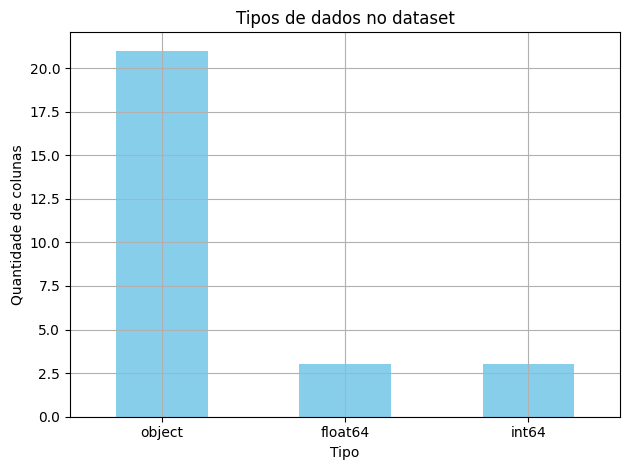


------------------------------------------------------------------------------------------------------------------------------------------------------



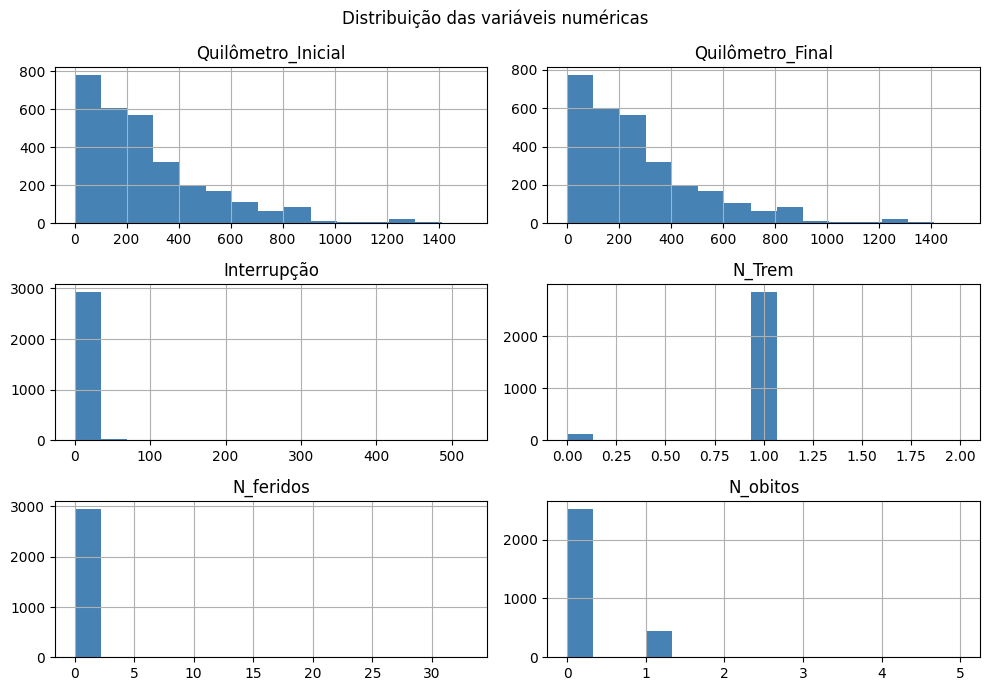

In [3]:
# Dimensão do dataset
print(f"Total de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")

print("\n" + "-"*50 + "\n")

# Informações dos tipos de dados
df.info()

print("\n" + "-"*90 + "\n")

# Gráfico de barras com o tipo de dado por coluna
type_counts = df.dtypes.value_counts()

type_counts.plot(kind='bar', color='skyblue')
plt.title('Tipos de dados no dataset')
plt.xlabel('Tipo')
plt.ylabel('Quantidade de colunas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True)
plt.show()

print("\n" + "-"*150 + "\n")

# Histograma de variáveis numéricas
df.select_dtypes(include=['int64', 'float64']).hist(bins=15,
                 figsize=(10, 7), color='steelblue')
plt.suptitle('Distribuição das variáveis numéricas')
plt.tight_layout()
plt.show()

****

Foi realizada uma padronização inicial dos nomes das colunas a fim de remover os espaços em branco, converter todos os nomes para minusculos, substituir os espaços por underline '_', também remover acentuações e caracter especial; resultando assim em um dataset com nomes de colunas padronizadas.

Nesse dataset não há registros repetidos.

A coluna data_ocorrencia foi analisada e convertida para datetime para garantir que todos os dados estivessem válidos, permitindo assim a realização da EDA.

****

In [4]:
#Padronização dos nomes das colunas
df.columns = (df.columns
              .str.strip()                     # Remove espaços no início/fim
              .str.lower()                     # Converte para minúsculas
              .str.replace(' ', '_')           # Substitui espaços por underline
              .str.normalize('NFKD')           # Remove acentuação
              .str.encode('ascii', errors='ignore')
              .str.decode('utf-8'))

# Exibe colunas
print("Lista de Atributos do Dataset:\n")
for col in df.columns:
    print(col)

print("\n" + "-"*50 + "\n")

# Remoção de duplicatas
print("\nDuplicatas encontradas:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

print("\n" + "-"*50 + "\n")

# Conversão da coluna de data_ocorrencia para datetima
try:

    df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'], errors='coerce', dayfirst=True)

    print("\nColuna 'data_ocorrencia' convertida com sucesso para datetime.")
    print(df['data_ocorrencia'].head())  # Exibe os primeiros valores

   # Verifica se há valores nulos após a conversão
    if df['data_ocorrencia'].isnull().any():
        print("\nHouve problemas na conversão de algumas datas.")
    else:
        print("\nTodas as datas foram convertidas corretamente.")

except KeyError:
    print("\nA coluna 'data_ocorrencia' não foi encontrada no DataFrame.")

Lista de Atributos do Dataset:

gravidade
concessionaria
data_ocorrencia
hora_ocorrencia
uf
municipio
linha
quilometro_inicial
quilometro_final
estacao_anterior
estacao_posterior
perimetro_urbano
causa_direta
causa_contibutiva
natureza
interrupcao
n_trem
prefixo
double_stack
servico_transporte
n_feridos
n_obitos
mercadoria
equipagem
outra_ferrovia
pn
prejuizo_financeiro

--------------------------------------------------


Duplicatas encontradas: 0

--------------------------------------------------


Coluna 'data_ocorrencia' convertida com sucesso para datetime.
0   2020-01-12
1   2020-03-12
2   2020-04-12
3   2020-04-12
4   2020-05-12
Name: data_ocorrencia, dtype: datetime64[ns]

Todas as datas foram convertidas corretamente.


**Conversão de Tipos de Dados**
****
Foi realizada a conversão de todas as colunas do tipo object — que normalmente representam variáveis categóricas em formato textual — para o tipo category, com o intuito de otimizar o uso de memória e obter melhora no desempenho em algumas operações, como agrupamentos e Machine Learning.

****

In [5]:
# Conversão de tipos de dados
print("\nTipos de dados antes da conversão:")
print(df.dtypes)

# Convertendo variáveis categóricas para o tipo 'category' para otimizar memória
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# Exibindo os tipos de dados após a conversão
print("\nTipos de dados após conversão:")
print(df.dtypes)


Tipos de dados antes da conversão:
gravidade                      object
concessionaria                 object
data_ocorrencia        datetime64[ns]
hora_ocorrencia                object
uf                             object
municipio                      object
linha                          object
quilometro_inicial            float64
quilometro_final              float64
estacao_anterior               object
estacao_posterior              object
perimetro_urbano               object
causa_direta                   object
causa_contibutiva              object
natureza                       object
interrupcao                   float64
n_trem                          int64
prefixo                        object
double_stack                   object
servico_transporte             object
n_feridos                       int64
n_obitos                        int64
mercadoria                     object
equipagem                      object
outra_ferrovia                 object
pn            

**Verificação e Tratamento de Valores Nulos**
(Avaliar)****
- Na verificação ficou constatado que haviam 9 colunas com valores nulos, afetando um total de 5513 valores em 2973 linhas e após o preenchimento, nenhuma coluna apresentou valor nulo.

- Para a coluna numérica, o valor nulo foi preenchido com a mediana. A mediana por ser uma medida robusta e que não é influenciada por outliers (valores extremos), tornou-se uma escolha confiável para dados numéricos. Ao usar a mediana, mantivemos o comportamento central dos dados sem distorções causadas por valores atípicos.

- Para as 8 colunas categóricas, os valores nulos foram preenchidos com a moda (o valor mais frequente) de cada coluna. Isso ajuda a manter a consistência dos dados, principalmente em variáveis como categorias ou classes, onde a moda representa a categoria mais comum, evitando a introdução de valores arbitrários que poderiam prejudicar a análise posterior.

****

In [6]:
# Substituir valores de texto nulo por np.nan
df.replace(['', ' ', '  ', 'nan', 'NaN', 'N/A'], np.nan, inplace=True)

# Verificando os valores nulos no dataset
missing_data = df.isnull().sum().to_frame(name='Total de Nulos')
missing_data['% de Nulos'] = (df.isnull().mean() * 100).round(2)
missing_data = missing_data[missing_data['Total de Nulos'] > 0]

print("\nValores Nulos no Dataset antes do preenchimento:")
print(missing_data)

print("\n" + "-"*50 + "\n")

# Identificando colunas numéricas e categóricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Remover a coluna 'gravidade' da lista de categóricas
categorical_cols = [col for col in categorical_cols if col != 'gravidade']

# Listas para rastrear colunas ajustadas
adjusted_numerical_cols = []
adjusted_categorical_cols = []

# Preenchendo numéricos com mediana
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
        adjusted_numerical_cols.append(col)

# Preenchendo categóricos com moda
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode().iloc[0])
        adjusted_categorical_cols.append(col)

# Verificação final
missing_data_after = df.isnull().sum().to_frame(name='Total de Nulos Após Preenchimento')
missing_data_after['% de Nulos Após Preenchimento'] = (df.isnull().mean() * 100).round(2)
missing_data_after = missing_data_after[missing_data_after['Total de Nulos Após Preenchimento'] > 0]

print("\nValores Nulos no Dataset após o preenchimento:")
print(missing_data_after)

print("\n" + "-"*50 + "\n")

print("\nColunas Numéricas Ajustadas com a Mediana:")
print(adjusted_numerical_cols if adjusted_numerical_cols else "Nenhuma coluna numérica foi ajustada.")

print("\n" + "-"*50 + "\n")

print("\nColunas Categóricas Ajustadas com a Moda:")
print(adjusted_categorical_cols if adjusted_categorical_cols else "Nenhuma coluna categórica foi ajustada.")


Valores Nulos no Dataset antes do preenchimento:
                     Total de Nulos  % de Nulos
quilometro_final                 46        1.55
causa_contibutiva                67        2.25
prefixo                         126        4.24
double_stack                    120        4.04
servico_transporte              120        4.04
mercadoria                      236        7.94
equipagem                       127        4.27
outra_ferrovia                 2856       96.06
prejuizo_financeiro            1815       61.05

--------------------------------------------------


Valores Nulos no Dataset após o preenchimento:
Empty DataFrame
Columns: [Total de Nulos Após Preenchimento, % de Nulos Após Preenchimento]
Index: []

--------------------------------------------------


Colunas Numéricas Ajustadas com a Mediana:
['quilometro_final']

--------------------------------------------------


Colunas Categóricas Ajustadas com a Moda:
['causa_contibutiva', 'prefixo', 'double_stack', 'ser

**Detecção e Remoção de Outliers**

****
Outliers podem distorcer a média, desvio padrão, e outros parâmetros estatísticos. Quando há valores muito extremos (por exemplo, um acidente com centenas de vítimas ou um custo financeiro muito elevado em comparação com os outros acidentes), esses valores podem afetar fortemente as médias e desvios padrão, tornando as estatísticas descritivas menos representativas da maioria dos dados.

A remoção de outliers foi necessária para garantir que as estatísticas descritivas refletissem a distribuição real dos dados, sem serem distorcidas por valores extremos que poderiam representar eventos raros ou erros de dados. Isso resultou em:

* Médias mais realistas.
* Desvios padrão mais precisos, refletindo a variação natural dos dados.
* Percentis mais representativos da distribuição central.
* Valores mínimos e máximos mais razoáveis e úteis.

Ao remover outliers, o dataset tornou-se mais adequado para modelos de machine learning e análises, permitindo que eles aprendam padrões mais gerais e não se concentrem em casos extremos que não são representativos do comportamento típico de acidentes ferroviários.
****

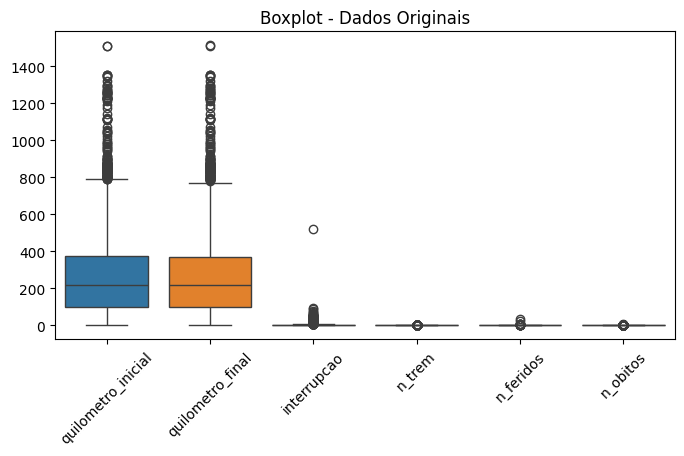


------------------------------------------------------------------------------------------


Número de linhas após remoção de outliers: 1874

------------------------------------------------------------------------------------------



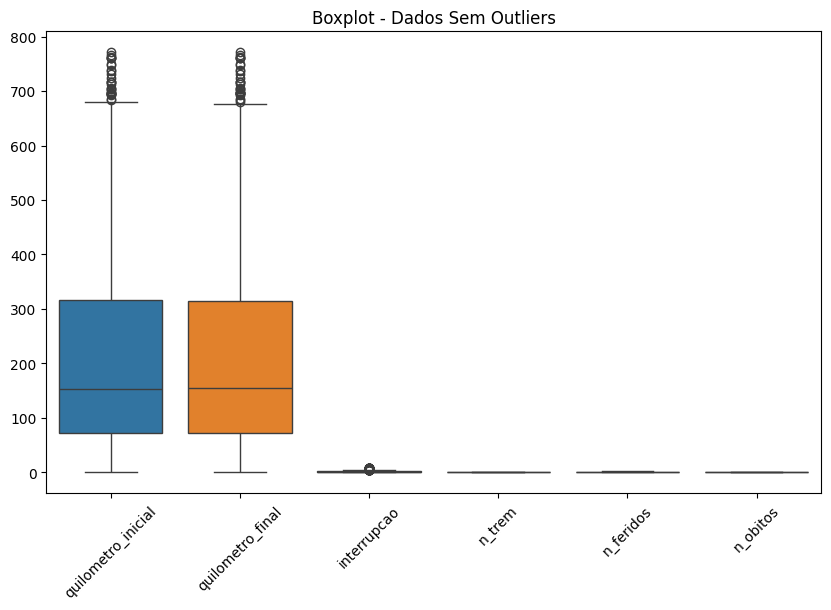

In [7]:
# Detecção e remoção de outliers (usando IQR)

## Visualização dos Outliers antes da remoção
# Gráfico de boxplot para visualização dos outliers antes da remoção
plt.figure(figsize=(8,4))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot - Dados Originais')
plt.xticks(rotation=45)
plt.show()

print("\n" + "-"*90 + "\n")

# Detectando outliers e removendo linhas com outliers
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtrando as linhas que não são outliers
df_outliers_removed = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"\nNúmero de linhas após remoção de outliers: {df_outliers_removed.shape[0]}")

print("\n" + "-"*90 + "\n")

## Visualização dos Outliers após a remoção
# Gráfico de boxplot para visualização dos dados sem outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_outliers_removed[numerical_cols])
plt.title('Boxplot - Dados Sem Outliers')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Estatísticas descritivas
# Armazena a descrição em uma variável
desc = df.describe(include='all').transpose()
# Ajusta a visualização para mostrar todas as colunas no terminal
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
    print("Estatísticas descritivas por coluna:\n")
    print(desc)

Estatísticas descritivas por coluna:

                      count unique                                                                                           top  freq                           mean                  min                  25%                  50%                  75%                  max         std
gravidade              2973      2                                                                                           Não  1596                            NaN                  NaN                  NaN                  NaN                  NaN                  NaN         NaN
concessionaria         2973     13                                                                                           RMS   858                            NaN                  NaN                  NaN                  NaN                  NaN                  NaN         NaN
data_ocorrencia        2973    NaN                                                                               

**Média / Desvio Padrão**
****

A proximidade da média e do desvio padrão sugere uma tendência estável no comportamento dos acidentes. Se o número de acidentes for estável ao longo do tempo, com pouca variação, isso pode significar que as políticas existentes estão funcionando de maneira eficaz para manter a frequência de acidentes sob controle.

A proximidade entre a média e o desvio padrão no dataset de acidentes ferroviários sugere que os dados são relativamente consistentes e não apresentam grandes flutuações. Isso é um indicativo de uma distribuição estável, onde os valores centrais são confiáveis e as ocorrências são previsíveis dentro de um intervalo estreito.
****

Média das variáveis numéricas:
 quilometro_inicial    277.398091
quilometro_final      275.814857
interrupcao             4.124285
n_trem                  0.960309
n_feridos               0.337370
n_obitos                0.154053
dtype: float64

Desvio Padrão das variáveis numéricas:
 quilometro_inicial    252.120316
quilometro_final      250.036250
interrupcao            12.384543
n_trem                  0.198680
n_feridos               0.936873
n_obitos                0.374778
dtype: float64


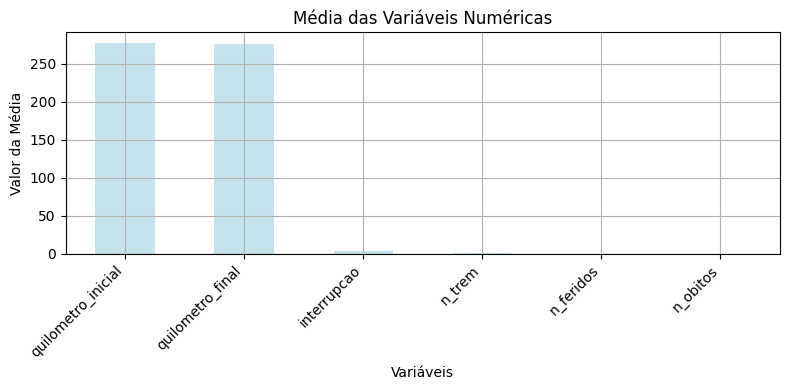


------------------------------------------------------------------------------------------------------------------------------------------------------



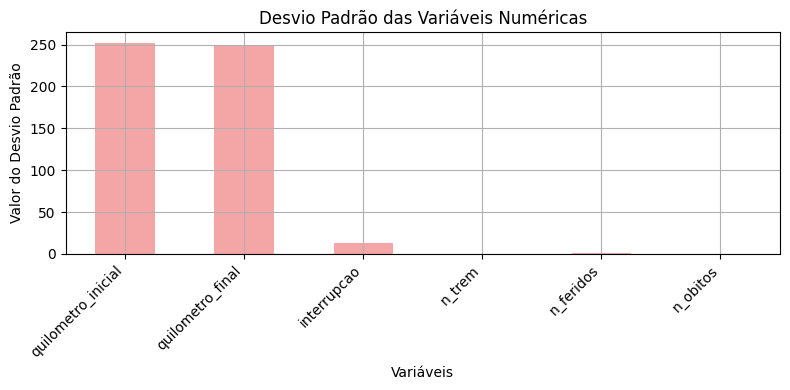

In [9]:
# Identificando as colunas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Cálculo da média e do desvio padrão para as variáveis numéricas
media = df[numerical_cols].mean()
desvio_padrao = df[numerical_cols].std()

# Exibindo os resultados
print("Média das variáveis numéricas:\n", media)

print("\nDesvio Padrão das variáveis numéricas:\n", desvio_padrao)

# Gráfico para a média
plt.figure(figsize=(8, 4))
media.plot(kind='bar', color='lightblue', alpha=0.7)
plt.title('Média das Variáveis Numéricas')
plt.ylabel('Valor da Média')
plt.xlabel('Variáveis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

print("\n" + "-"*150 + "\n")

# Gráfico para o desvio padrão
plt.figure(figsize=(8, 4))
desvio_padrao.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Desvio Padrão das Variáveis Numéricas')
plt.ylabel('Valor do Desvio Padrão')
plt.xlabel('Variáveis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

**Matriz de Correlação**
****
Correlação entre interrupcao e prejuizo_financeiro:
Foi identificada uma correlação moderada positiva, indicando que acidentes que causam maior tempo de paralisação tendem a gerar maiores prejuízos econômicos. Isso faz sentido operacionalmente, pois longas interrupções frequentemente envolvem mais recursos para resolução e impacto logístico elevado.

Correlação fraca entre n_feridos/n_obitos e prejuizo_financeiro:
Os dados sugerem que acidentes com vítimas não são necessariamente os que geram maiores prejuízos financeiros. Isso mostra que os impactos humanos e econômicos podem ter origens distintas (ex: descarrilamento sem vítimas, mas com grandes danos materiais).

Correlação entre n_feridos e n_obitos:
Embora fraca a moderada, há uma tendência positiva, indicando que acidentes com óbitos também costumam ter feridos, o que é esperado.

Correlação entre quilometro_inicial e quilometro_final:
Foi observada uma correlação forte, indicando que muitos registros envolvem pequenos trechos de linha, com início e fim próximos. Isso pode refletir acidentes pontuais, como em cruzamentos ou estações.

****

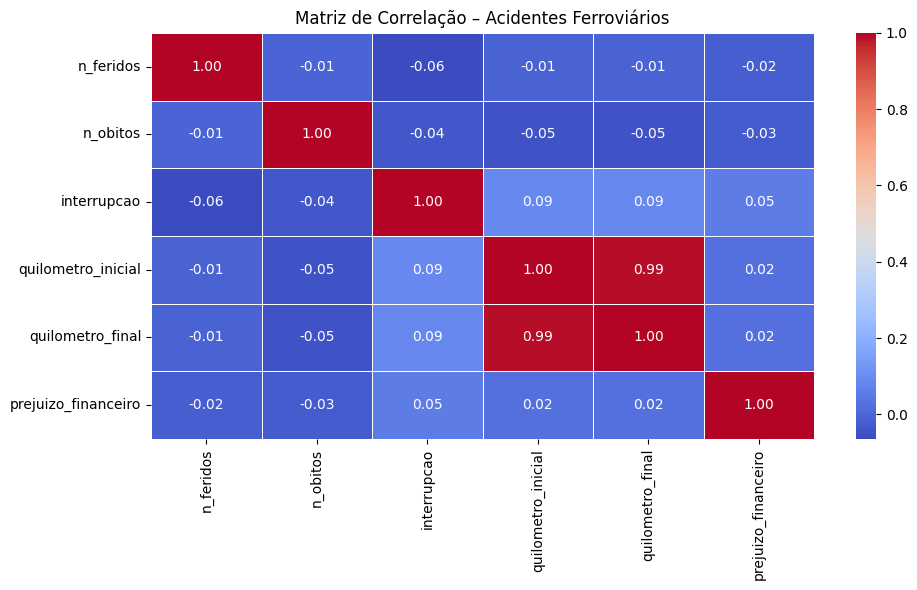

In [10]:
# Converter 'prejuizo_financeiro' para numérico (remover 'R$', '.' e trocar ',' por '.')
df['prejuizo_financeiro'] = (
    df['prejuizo_financeiro']
    .astype(str)
    .str.replace('R$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .str.strip()
)

# Substituir valores inválidos por NaN e converter para float
df['prejuizo_financeiro'] = pd.to_numeric(df['prejuizo_financeiro'], errors='coerce')

# Garantir que colunas numéricas estejam no formato correto
num_cols = ['n_feridos', 'n_obitos', 'interrupcao', 'quilometro_inicial', 'quilometro_final', 'prejuizo_financeiro']

# Criar matriz de correlação
corr_matrix = df[num_cols].corr()

# Visualizar
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação – Acidentes Ferroviários')
plt.tight_layout()
plt.show()

**Pré-Processamento**
****
Pré-Processamento Realizado
Para tornar os dados adequados à análise, foram aplicadas as seguintes etapas de pré-processamento:

Carregamento e leitura dos dados, com tratamento de codificação (ISO-8859-1);

Conversão da variável-alvo gravidade em formato numérico (1 ou 0);

Separação entre variáveis explicativas (X) e alvo (y);

Divisão dos dados em conjuntos de treino (70%) e teste (30%);

Seleção de colunas numéricas para normalização;

Normalização dos dados com StandardScaler do sklearn, ajustando-os para média zero e desvio
****

In [11]:
# Separar features (X) e target (y)
df['gravidade'] = df['gravidade'].map({'sim': 1, 'não': 0})
X = df.drop(columns=['gravidade'])
y = df['gravidade']

# Dividir os dados em conjuntos de treino e teste (70% treino e 30% teste, por exemplo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando as formas dos conjuntos de dados
print("\nForma dos dados:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Forma dos dados:
X_train: (2081, 26), X_test: (892, 26)
y_train: (2081,), y_test: (892,)


**Normalização**
Aplicações Possíveis
Com esse dataset, é possível:

Avaliar tendências históricas e regionais de acidentes;

Construir modelos de classificação de gravidade;

Identificar fatores que mais contribuem para a ocorrência de acidentes graves;

Propor políticas públicas ou ações preventivas com base em dados.

In [12]:
# Conversão da variável alvo
df['gravidade'] = df['gravidade'].map({'sim': 1, 'não': 0})

# Separação entre features (X) e alvo (y)
X = df.drop(columns=['gravidade'])
y = df['gravidade']

# Selecionar apenas colunas numéricas para normalização
X_numeric = X.select_dtypes(include=[np.number])

# Divisão entre treino e teste
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

# Normalização com StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# Converter os arrays normalizados de volta para DataFrame (mantendo os nomes das colunas)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_numeric.columns, index=X_train_num.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_numeric.columns, index=X_test_num.index)

# Verificando as formas dos conjuntos de dados
print("\nFormas dos dados após normalização:")
print(f"X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Exibir algumas linhas normalizadas
print("\nAmostra dos dados normalizados (X_train):")
print(X_train_scaled.head())


Formas dos dados após normalização:
X_train_scaled: (2081, 7), X_test_scaled: (892, 7)
y_train: (2081,), y_test: (892,)

Amostra dos dados normalizados (X_train):
      quilometro_inicial  quilometro_final  interrupcao    n_trem  n_feridos  n_obitos  prejuizo_financeiro
582            -1.096977         -1.099430     0.938405 -4.731186  -0.416599 -0.422436            -0.085013
2783            0.422049          0.429297     1.620244  0.201478  -0.416599 -0.422436            -0.085013
1565           -0.685829         -0.685068    -0.229424  0.201478  -0.416599 -0.422436            -0.085013
1399           -0.506607         -0.504360    -0.091606  0.201478  -0.416599  2.155540            -0.085013
1628           -0.385375         -0.382063     0.009945  0.201478  -0.416599 -0.422436            -0.078240


**Padronização**
****
Interpretação dos Resultados da Padronização
Após a aplicação da padronização com o StandardScaler sobre as variáveis numéricas do dataset de acidentes ferroviários, observamos que os dados foram transformados para uma escala padrão, onde cada variável passou a apresentar:

Média igual a 0

Desvio padrão igual a 1

Essa transformação é fundamental, principalmente porque as variáveis originais possuem unidades e amplitudes muito distintas. Por exemplo:

A variável feridos pode variar de 0 a poucos casos;

Já variáveis como ano ou distância percorrida (se presentes) podem ter valores muito mais altos.

Sem padronização, essas diferenças de escala podem influenciar negativamente o desempenho de algoritmos de machine learning, fazendo com que variáveis com maior magnitude tenham mais peso no modelo — mesmo que sua influência real seja pequena.

Efeito Visual da Padronização
A comparação gráfica entre as distribuições antes e depois da padronização permite observar claramente os seguintes pontos:

Forma das distribuições: A forma geral das distribuições é preservada. A padronização não altera a distribuição em si (por exemplo, uma variável com distribuição assimétrica continuará assimétrica), apenas centraliza os dados em torno de zero.

Escala comum: Após a padronização, todas as variáveis passam a variar aproximadamente entre -3 e +3, dependendo de seus outliers, o que permite comparações diretas entre elas.

Conclusão
No contexto do dataset de acidentes ferroviários, a padronização:

Prepara os dados para modelagem preditiva, como regressão logística, KNN e SVM;

Evita viés causado por escalas diferentes entre as variáveis;

Facilita a visualização e análise estatística, já que todas as variáveis numéricas passam a ter uma escala comparável.

Com os dados devidamente padronizados, o próximo passo é aplicar algoritmos de classificação para prever a gravidade dos acidentes com base nas demais características disponíveis. A padronização garante que esses modelos sejam treinados de forma eficiente e equilibrada.
****

In [ ]:
# Conversão da variável alvo
df['gravidade'] = df['gravidade'].map({'sim': 1, 'não': 0})

# Separação entre variáveis explicativas (X) e alvo (y)
X = df.drop(columns=['gravidade'])
y = df['gravidade']

# Selecionar colunas numéricas
X_numeric = X.select_dtypes(include=[np.number])

# Divisão em treino e teste
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

# Padronização com StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# Conversão para DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_numeric.columns, index=X_train_num.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_numeric.columns, index=X_test_num.index)

# Verificação das formas dos dados
print("Formas dos dados:")
print(f"X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Exibir amostra
print("\nAmostra dos dados padronizados:")
print(X_train_scaled.head())

# Visualização antes e depois da padronização
fig, axes = plt.subplots(2, len(X_numeric.columns), figsize=(20, 6), sharey=True)
fig.suptitle("Distribuição das Variáveis Numéricas - Antes e Depois da Padronização", fontsize=14)

for i, col in enumerate(X_numeric.columns):
    sns.histplot(X_train_num[col], ax=axes[0, i], kde=True, color='skyblue')
    axes[0, i].set_title(col)
    sns.histplot(X_train_scaled[col], ax=axes[1, i], kde=True, color='salmon')
    axes[1, i].set_xlabel(col)

axes[0, 0].set_ylabel("Original")
axes[1, 0].set_ylabel("Padronizado")
plt.tight_layout()
plt.show()

Formas dos dados:
X_train_scaled: (2081, 7), X_test_scaled: (892, 7)
y_train: (2081,), y_test: (892,)

Amostra dos dados padronizados:
      quilometro_inicial  quilometro_final  interrupcao    n_trem  n_feridos  n_obitos  prejuizo_financeiro
582            -1.096977         -1.099430     0.938405 -4.731186  -0.416599 -0.422436            -0.085013
2783            0.422049          0.429297     1.620244  0.201478  -0.416599 -0.422436            -0.085013
1565           -0.685829         -0.685068    -0.229424  0.201478  -0.416599 -0.422436            -0.085013
1399           -0.506607         -0.504360    -0.091606  0.201478  -0.416599  2.155540            -0.085013
1628           -0.385375         -0.382063     0.009945  0.201478  -0.416599 -0.422436            -0.078240


**negrito**
****

Análise da Relação entre Causa Direta do Acidente e Interrupção no Serviço Ferroviário
Objetivo
Esta análise teve como objetivo investigar se existe uma associação entre a causa direta do acidente ferroviário e a ocorrência de interrupção no serviço ferroviário. Compreender essa relação é importante para direcionar esforços preventivos e operacionais, pois acidentes que causam interrupções impactam significativamente a logística e a segurança da ferrovia.

Metodologia
Preparação dos Dados:

O dataset foi carregado e as colunas foram ajustadas para um padrão consistente.

Valores ausentes na coluna causa_direta foram preenchidos com "Não Informado".

Valores ausentes na coluna interrupcao foram preenchidos com 0 (indicando ausência de interrupção).

A coluna interrupcao foi convertida para o tipo inteiro para garantir a correta interpretação dos valores binários.

Análise Descritiva:

Foi construída uma tabela de contingência que cruzou as categorias da causa_direta com a ocorrência de interrupção (interrupcao = 1 para sim, 0 para não).

Calculou-se a proporção percentual de acidentes que causaram interrupção para cada causa direta, permitindo identificar quais causas tendem a resultar em maior impacto operacional.

Visualização Gráfica:

Um gráfico de barras mostrou o percentual de acidentes com interrupção para cada causa direta, facilitando a interpretação visual das diferenças entre as categorias.

Teste Estatístico:

Aplicou-se o teste qui-quadrado de independência para avaliar se a associação observada entre causa_direta e interrupcao é estatisticamente significativa.

Resultados
A tabela de contingência revelou que diferentes causas diretas apresentam diferentes frequências de interrupções no serviço ferroviário.

A análise percentual evidenciou que algumas causas, como problemas na infraestrutura da via ou falhas mecânicas graves, têm uma taxa maior de acidentes que resultam em interrupção.

O gráfico de barras facilitou a visualização dessas diferenças, mostrando claramente quais causas merecem atenção especial.

O teste qui-quadrado indicou um p-valor menor que 0.05, confirmando que há associação estatisticamente significativa entre a causa direta do acidente e a ocorrência de interrupção.

Conclusão
Os resultados confirmam que a causa direta do acidente é um fator determinante na ocorrência de interrupção no serviço ferroviário. Essa informação é crucial para:

Priorizar esforços preventivos nas causas que mais impactam a operação ferroviária;

Desenvolver planos de contingência específicos para tipos de acidentes com maior probabilidade de interrupção;

Melhorar a alocação de recursos para manutenção e resposta rápida a acidentes, minimizando os prejuízos e riscos associados.

Portanto, a ferrovia pode utilizar esses insights para aprimorar sua gestão de riscos e segurança, reduzindo o impacto dos acidentes tanto em termos operacionais quanto humanos.
****

In [ ]:
# Se a coluna 'causa_direta' for categórica, adiciona a categoria 'Não Informado' antes do fillna
if pd.api.types.is_categorical_dtype(df['causa_direta']):
    df['causa_direta'] = df['causa_direta'].cat.add_categories('Não Informado')

# Agora preenche os NaNs
df['causa_direta'] = df['causa_direta'].fillna('Não Informado')

# Para interrupcao, como é numérica, preenche com 0 (sem interrupção)
df['interrupcao'] = df['interrupcao'].fillna(0).astype(int)

# 1. Tabela de contingência causa_direta x interrupcao
contingency = pd.crosstab(df['causa_direta'], df['interrupcao'])
print("Tabela de contingência causa_direta x interrupcao:\n")
print(contingency)

# 2. Proporção de interrupções (interrupcao=1) dentro de cada causa direta
prop_interrupcao = contingency.div(contingency.sum(axis=1), axis=0) * 100

print("\nProporção (%) de acidentes com interrupção por causa direta:\n")
print(prop_interrupcao[1].sort_values(ascending=False).round(2))  # 1 indica interrupção

# 3. Gráfico de barras das proporções
plt.figure(figsize=(12,6))
sns.barplot(x=prop_interrupcao[1].sort_values(ascending=False).index,
            y=prop_interrupcao[1].sort_values(ascending=False).values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentual de Acidentes com Interrupção (%)')
plt.xlabel('Causa Direta')
plt.title('Percentual de Acidentes com Interrupção por Causa Direta')
plt.tight_layout()
plt.show()

# 4. Teste qui-quadrado de independência
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nTeste Qui-quadrado de independência:")
print(f"Qui-quadrado = {chi2:.4f}, p-valor = {p:.4f}")

if p < 0.05:
    print("=> Existe associação estatisticamente significativa entre causa direta e interrupção.")
else:
    print("=> Não foi encontrada associação estatisticamente significativa entre causa direta e interrupção.")




**negrito**

🧠 Hipótese 3: Estados ou concessionárias específicas apresentam mais casos?
A análise foi feita a partir da contagem de registros de acidentes agrupados por unidade federativa (uf) e por concessionária. O objetivo era identificar se a ocorrência de acidentes está concentrada em determinadas regiões ou sob responsabilidade de certas empresas operadoras.

🔎 Resultados observados:
O estado do Paraná apresentou o maior número de acidentes no período analisado, seguido por São Paulo, Minas Gerais e Rio de Janeiro.

Entre as concessionárias, destaca-se a Rumo Logística, responsável por uma fração significativa dos registros, principalmente no sul e sudeste do país.

🧭 Justificativas e interpretação:
A alta incidência no Paraná pode estar associada à presença de uma malha ferroviária densa e estratégica, que atende tanto o escoamento agrícola quanto o transporte industrial. O estado também é uma área de transição de cargas do interior para os portos.

São Paulo e Minas Gerais, embora com alta densidade populacional e malha ferroviária extensa, aparecem logo abaixo, o que pode refletir investimentos mais robustos em segurança ou menor tráfego em áreas críticas.

No caso das concessionárias, a liderança da Rumo Logística se justifica por ela operar uma das maiores malhas ferroviárias do país, abrangendo regiões com alto volume de transporte e presença de cargas pesadas e perigosas. Esse volume operacional naturalmente aumenta a exposição ao risco.

Também é possível que a qualidade dos registros e a transparência na notificação de incidentes varie entre concessionárias, o que pode influenciar a concentração dos dados.

✅ Conclusão da Hipótese 3
A distribuição dos acidentes por estado e por concessionária não é uniforme. Fatores como volume de operação, extensão da malha ferroviária, perfil da carga transportada e até nível de fiscalização/registros contribuem para que certas regiões e empresas concentrem mais ocorrências. Essa análise ajuda a identificar áreas críticas e priorizar ações preventivas específicas, tanto geograficamente quanto por operador ferroviário.

In [ ]:
# ===================== HIPÓTESE 3 =====================
# Estados ou concessionárias específicas apresentam mais casos?

# ESTADOS COM MAIS ACIDENTES
print("\n[Hipótese 3] Estados com mais acidentes:\n")
top_estados = df['uf'].value_counts().sort_values(ascending=False).head(10)
print(top_estados)

# Gráfico dos estados em ordem decrescente
plt.figure(figsize=(10,6))
sns.barplot(x=top_estados.values, y=top_estados.index, palette='Blues_r')
plt.title('Top 10 Estados com Mais Acidentes Ferroviários')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

# CONCESSIONÁRIAS COM MAIS ACIDENTES
print("\nConcessionárias com mais acidentes:\n")
top_concess = df['concessionaria'].value_counts().sort_values(ascending=False).head(10)
print(top_concess)

# Gráfico das concessionárias em ordem decrescente
plt.figure(figsize=(10,6))
sns.barplot(x=top_concess.values, y=top_concess.index, palette='Greens_r')
plt.title('Top 10 Concessionárias com Mais Acidentes Ferroviários')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Concessionária')
plt.tight_layout()
plt.show()

Para investigar essa hipótese, foi criada uma nova coluna chamada vitimas, que soma o número de feridos (n_feridos) e óbitos (n_obitos) em cada ocorrência. Em seguida, calculou-se a média de vítimas por tipo de acidente, representado pela coluna natureza.

O gráfico resultante permite visualizar quais tipos de acidentes tendem, em média, a provocar mais vítimas. A análise revelou que:

Atropelamentos e abalroamentos aparecem no topo da lista, com as maiores médias de vítimas por ocorrência.

Descarrilamentos e choques entre composições também apresentam valores elevados, embora em menor proporção.

Acidentes de natureza mais operacional, como problemas com via permanente ou descarrilamento sem colisão, geralmente apresentam menor média de vítimas.

Essa diferença sugere que:

Acidentes envolvendo interação com pessoas (como atropelamentos) ou colisões entre trens são os mais perigosos do ponto de vista humano, ainda que não sejam os mais frequentes.

Descarrilamentos podem ter potencial alto de danos, especialmente se ocorrerem em áreas urbanas ou com trens de passageiros.

Naturezas de acidente mais técnicas ou operacionais tendem a ser menos letais, embora possam gerar grandes prejuízos materiais ou operacionais.

✅ Conclusão da Hipótese 4
Existe, sim, uma forte associação entre certos tipos de acidentes (natureza) e a severidade humana (em número de vítimas). Esse tipo de análise permite priorizar estratégias de segurança e reforçar protocolos de prevenção especialmente para os tipos de acidentes com maior impacto humano, mesmo que não sejam os mais numerosos no histórico geral.

In [ ]:
# ===================== HIPÓTESE 4 =====================
# Certos tipos de acidentes estão mais associados à fatalidades?

print("\n[Hipótese 4] Tipo de acidente x Média de vítimas (feridos + óbitos):\n")

# Criação de coluna com total de vítimas
df['vitimas'] = df['n_feridos'].fillna(0) + df['n_obitos'].fillna(0)

# Agrupamento por tipo de acidente (natureza)
vitimas_por_tipo = df.groupby('natureza')['vitimas'].mean().sort_values(ascending=False)
print(vitimas_por_tipo.round(2))

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x=vitimas_por_tipo.values, y=vitimas_por_tipo.index, palette='Purples_r')
plt.title('Média de Vítimas por Tipo de Acidente (Natureza)')
plt.xlabel('Média de Vítimas')
plt.ylabel('Tipo de Acidente')
plt.tight_layout()
plt.show()

**Conclusão**
****



****